In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('data1-1.csv')

df.head(5)

,ID,Gender,Education,Annual Income,Age,Location,Monthly Household Spend,Technology Adoption,TV Viewing,Date
0,c3,male,BA,58,66,Massachusetts,103,early,0,2022/1/4
1,c4,male,PhD,51,78,New York,154,late,5,2022/4/5
2,c6,female,BA,31,72,New Jersey,21,early,1,2022/1/6
3,c11,female,PhD,29,25,Florida,66,early,6,2022/7/7
4,c13,male,BA,64,80,New Jersey,257,early,1,2022/1/8


## Part 1: see distribution

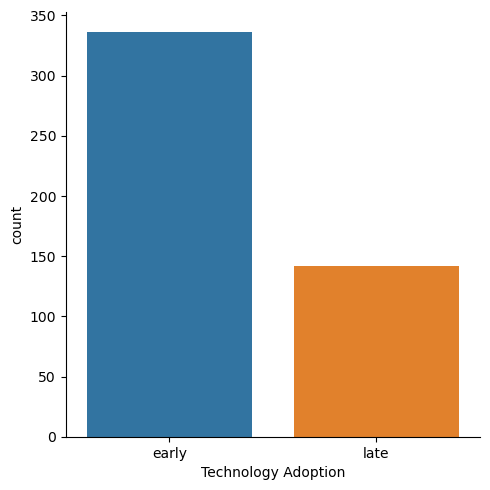

In [3]:
#Show the distribution of “technology adoption”

sns.catplot(data=df, x='Technology Adoption', kind='count')


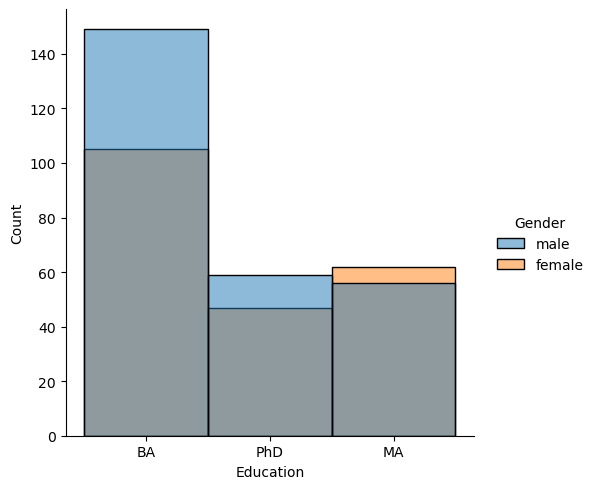

In [4]:
#Show the distribution of “education” for different “gender” (i.e., male and female) .

sns.displot(data=df, x='Education', hue='Gender')


## Part 2: explore categorical variable

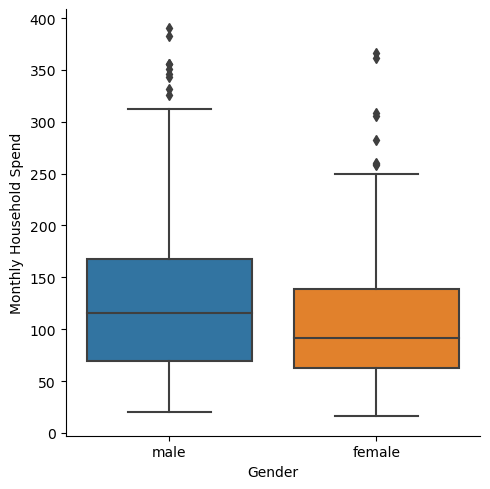

In [5]:
#Make a box plot for the variable “Monthly household spend” and “gender”

sns.catplot(data=df, x='Gender', y='Monthly Household Spend', kind='box')

F:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


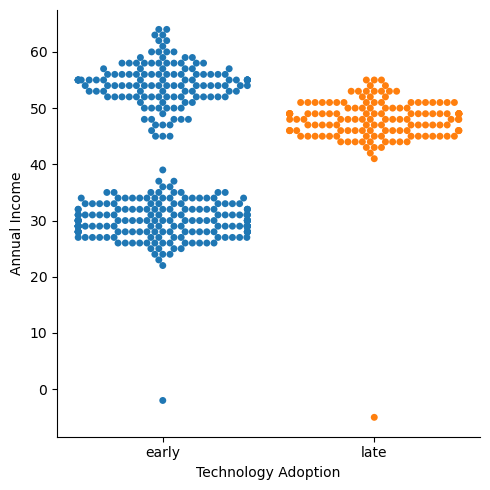

In [6]:
#Make a swarm plot for the variable “technology adoption” and “annual income”
high_outlier = df['Annual Income'].mean()+df['Annual Income'].std()
low_outlier = df['Annual Income'].mean()-df['Annual Income'].std()

df.drop(df[(df['Annual Income']>high_outlier)|(df['Annual Income']<low_outlier)].index,inplace=True)

sns.catplot(data=df, x="Technology Adoption", y="Annual Income", kind="swarm")

## Part 3: explore relating variables

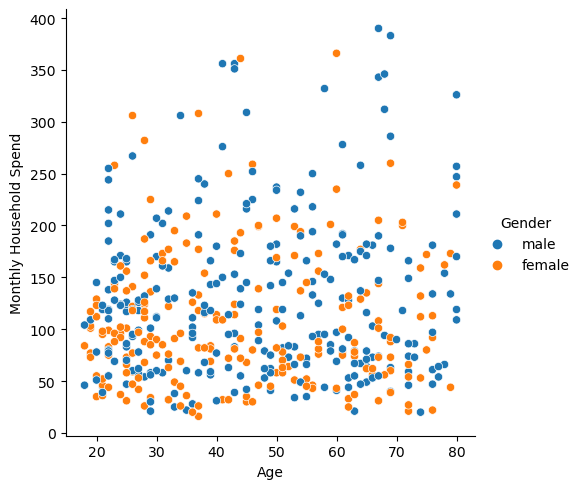

In [7]:
#Make a scatter plot between the variable “Age” and “Monthly household spend” for different “gender”

sns.relplot(data=df, x='Age', y='Monthly Household Spend', hue='Gender', kind='scatter')

<AxesSubplot:>

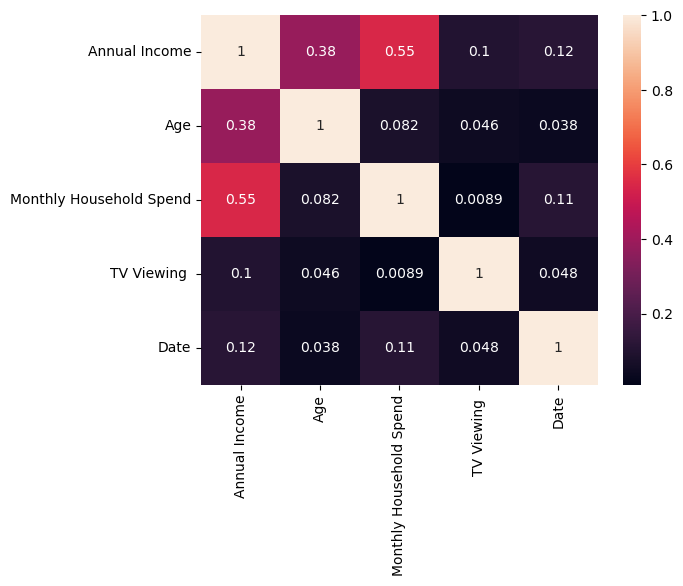

In [8]:
#Make a heat map for all relating variables

sns.heatmap(df.corr(), vmin=None,vmax=None, cmap=None, annot=True)

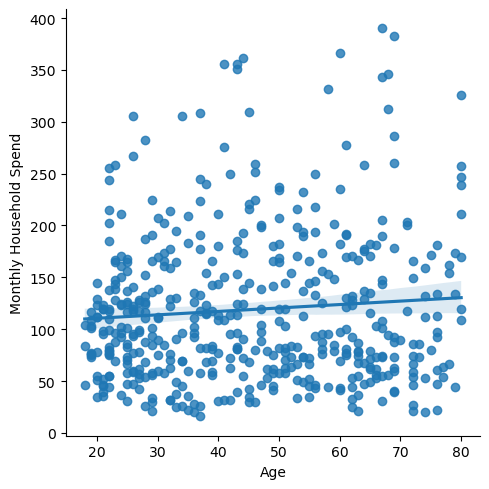

In [9]:
#Show estimated regression lines between the variable “Age” and “Monthly household spend”.
sns.lmplot(data=df, x='Age', y='Monthly Household Spend', hue=None)

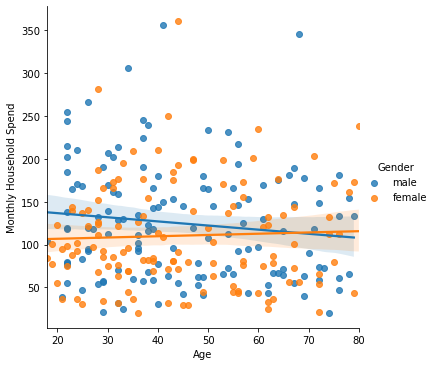

In [10]:
#Compare the above regression lines for different genders
sns.lmplot(data=df, x='Age', y='Monthly Household Spend', hue='Gender')

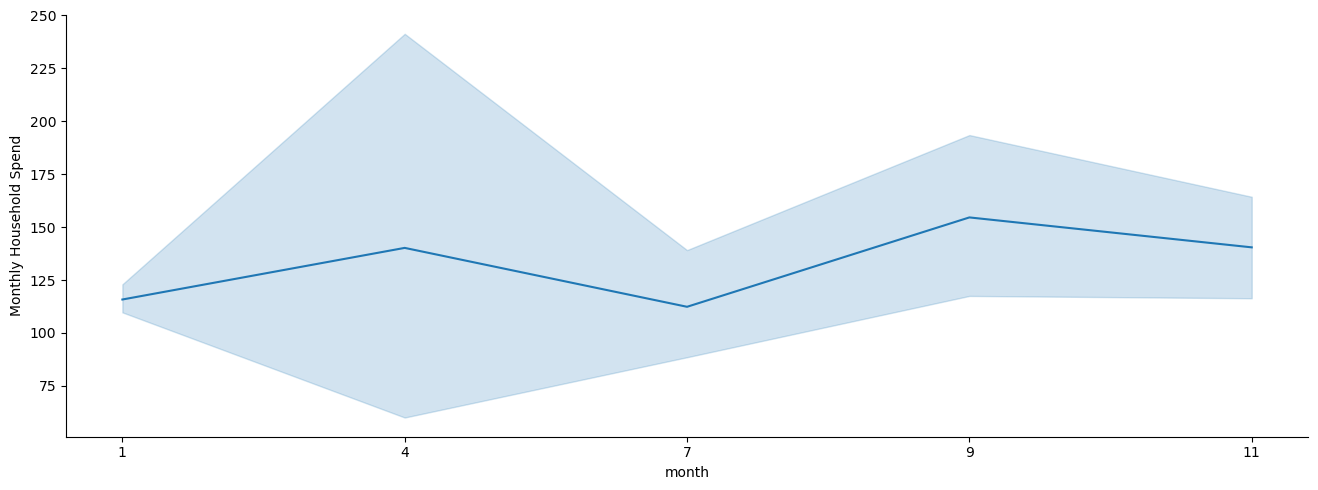

In [6]:
#See how the monthly household spending change over time
df[['year','month','day']]=df['Date'].str.split(pat='/',expand=True)
g= sns.relplot(data=df, x="month", y="Monthly Household Spend", kind="line")
g.fig.set_size_inches(15,5)